Mounting Google Drive

In [1]:

!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing libraries

In [2]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


from utils import (
   test, train, plot_losses

)

from model import Net
from torchsummary import summary

from torch.optim.lr_scheduler import StepLR
%matplotlib inline

Updating Device to CUDA

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu") #c2

CUDA Available? True


Defining data tranformations

In [4]:
train_transforms = transforms.Compose([
   #transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    #transforms.Resize((28, 28)),
    #transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])



Downloading MNIST dataset and splitting to train and test set

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 132907879.53it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 39202489.91it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29463176.40it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 12204054.30it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Creating Data Loaders from train data and test data

In [6]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

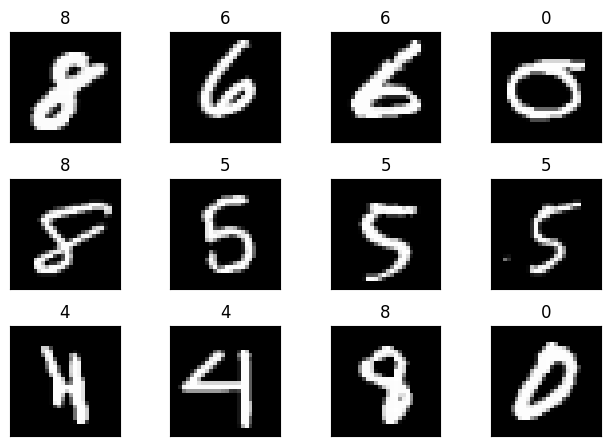

In [7]:
batch_data, batch_label = next(iter(train_loader))
fig = plt.figure()
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    plt.imshow(batch_data[i].squeeze(0), cmap='gray')
    plt.title(batch_label[i].item())
    plt.xticks([])
    plt.yticks([])
plt.show()

## Data Statistics

torch.Size([512, 1, 28, 28])
torch.Size([512])


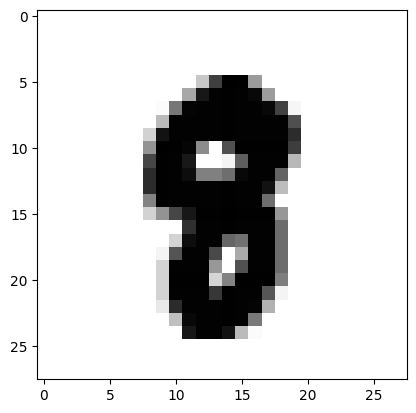

In [8]:
# train_data1 = train_data.train_data
# train_data = train_data.transform(train_data1.numpy())

# print('[Train]')
# print(' - Numpy Shape:', train_data.train_data.cpu().numpy().shape)
# print(' - Tensor Shape:', train_data.train_data.size())
# print(' - min:', torch.min(train_data))
# print(' - max:', torch.max(train_data))
# print(' - mean:', torch.mean(train_data))
# print(' - std:', torch.std(train_data))
# print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

Viewing images

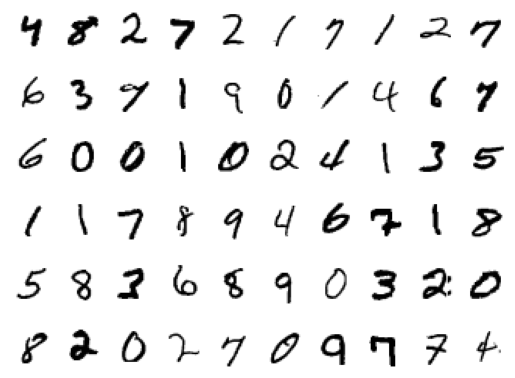

In [9]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

Transferring model to GPU and printing model summary

In [10]:
model1 = Net().to(device)
summary(model1, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 10, 22, 22]             900
             ReLU-10           [-1, 10, 22, 22]               0
      BatchNorm2d-11           [-1, 10, 22, 22]              20
          Dropout-12           [-1, 10, 22, 22]               0
        MaxPool2d-13           [-1, 10, 11, 11]               0
           Conv2d-14           [-1, 16,

Training and evaluating the model

In [11]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer)
    test(model, device, test_loader)

EPOCH: 0


Train: Loss=0.7394 Batch_id=117 Accuracy=73.75: 100%|██████████| 118/118 [00:16<00:00,  7.06it/s]


Test set: Average loss: 0.5829, Accuracy: 9229/10000 (92.29%)

EPOCH: 1


Train: Loss=0.3503 Batch_id=117 Accuracy=94.08: 100%|██████████| 118/118 [00:19<00:00,  6.06it/s]


Test set: Average loss: 0.2779, Accuracy: 9629/10000 (96.29%)

EPOCH: 2


Train: Loss=0.2724 Batch_id=117 Accuracy=96.14: 100%|██████████| 118/118 [00:14<00:00,  8.09it/s]


Test set: Average loss: 0.1912, Accuracy: 9699/10000 (96.99%)

EPOCH: 3


Train: Loss=0.2297 Batch_id=117 Accuracy=96.96: 100%|██████████| 118/118 [00:15<00:00,  7.40it/s]


Test set: Average loss: 0.1411, Accuracy: 9773/10000 (97.73%)

EPOCH: 4


Train: Loss=0.1346 Batch_id=117 Accuracy=97.27: 100%|██████████| 118/118 [00:17<00:00,  6.86it/s]


Test set: Average loss: 0.1261, Accuracy: 9783/10000 (97.83%)

EPOCH: 5


Train: Loss=0.1043 Batch_id=117 Accuracy=97.61: 100%|██████████| 118/118 [00:17<00:00,  6.71it/s]


Test set: Average loss: 0.1050, Accuracy: 9789/10000 (97.89%)

EPOCH: 6


Train: Loss=0.1281 Batch_id=117 Accuracy=97.90: 100%|██████████| 118/118 [00:17<00:00,  6.87it/s]


Test set: Average loss: 0.0920, Accuracy: 9821/10000 (98.21%)

EPOCH: 7


Train: Loss=0.1151 Batch_id=117 Accuracy=98.02: 100%|██████████| 118/118 [00:15<00:00,  7.56it/s]


Test set: Average loss: 0.0792, Accuracy: 9826/10000 (98.26%)

EPOCH: 8


Train: Loss=0.1638 Batch_id=117 Accuracy=98.22: 100%|██████████| 118/118 [00:14<00:00,  7.98it/s]


Test set: Average loss: 0.0726, Accuracy: 9853/10000 (98.53%)

EPOCH: 9


Train: Loss=0.0472 Batch_id=117 Accuracy=98.25: 100%|██████████| 118/118 [00:14<00:00,  7.96it/s]


Test set: Average loss: 0.0697, Accuracy: 9841/10000 (98.41%)

EPOCH: 10


Train: Loss=0.1189 Batch_id=117 Accuracy=98.36: 100%|██████████| 118/118 [00:15<00:00,  7.50it/s]


Test set: Average loss: 0.0683, Accuracy: 9840/10000 (98.40%)

EPOCH: 11


Train: Loss=0.0679 Batch_id=117 Accuracy=98.45: 100%|██████████| 118/118 [00:15<00:00,  7.81it/s]


Test set: Average loss: 0.0613, Accuracy: 9854/10000 (98.54%)

EPOCH: 12


Train: Loss=0.0676 Batch_id=117 Accuracy=98.50: 100%|██████████| 118/118 [00:16<00:00,  6.96it/s]


Test set: Average loss: 0.0566, Accuracy: 9867/10000 (98.67%)

EPOCH: 13


Train: Loss=0.0384 Batch_id=117 Accuracy=98.58: 100%|██████████| 118/118 [00:15<00:00,  7.48it/s]


Test set: Average loss: 0.0557, Accuracy: 9860/10000 (98.60%)

EPOCH: 14


Train: Loss=0.1155 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [00:16<00:00,  7.34it/s]


Test set: Average loss: 0.0513, Accuracy: 9873/10000 (98.73%)

EPOCH: 15


Train: Loss=0.0405 Batch_id=117 Accuracy=98.63: 100%|██████████| 118/118 [00:14<00:00,  7.91it/s]


Test set: Average loss: 0.0514, Accuracy: 9877/10000 (98.77%)

EPOCH: 16


Train: Loss=0.1278 Batch_id=117 Accuracy=98.73: 100%|██████████| 118/118 [00:18<00:00,  6.38it/s]


Test set: Average loss: 0.0508, Accuracy: 9873/10000 (98.73%)

EPOCH: 17


Train: Loss=0.0546 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [00:14<00:00,  7.88it/s]


Test set: Average loss: 0.0458, Accuracy: 9879/10000 (98.79%)

EPOCH: 18


Train: Loss=0.0421 Batch_id=117 Accuracy=98.76: 100%|██████████| 118/118 [00:14<00:00,  8.02it/s]


Test set: Average loss: 0.0479, Accuracy: 9877/10000 (98.77%)

EPOCH: 19


Train: Loss=0.0328 Batch_id=117 Accuracy=98.81: 100%|██████████| 118/118 [00:15<00:00,  7.65it/s]


Test set: Average loss: 0.0420, Accuracy: 9899/10000 (98.99%)



## Plot Losses

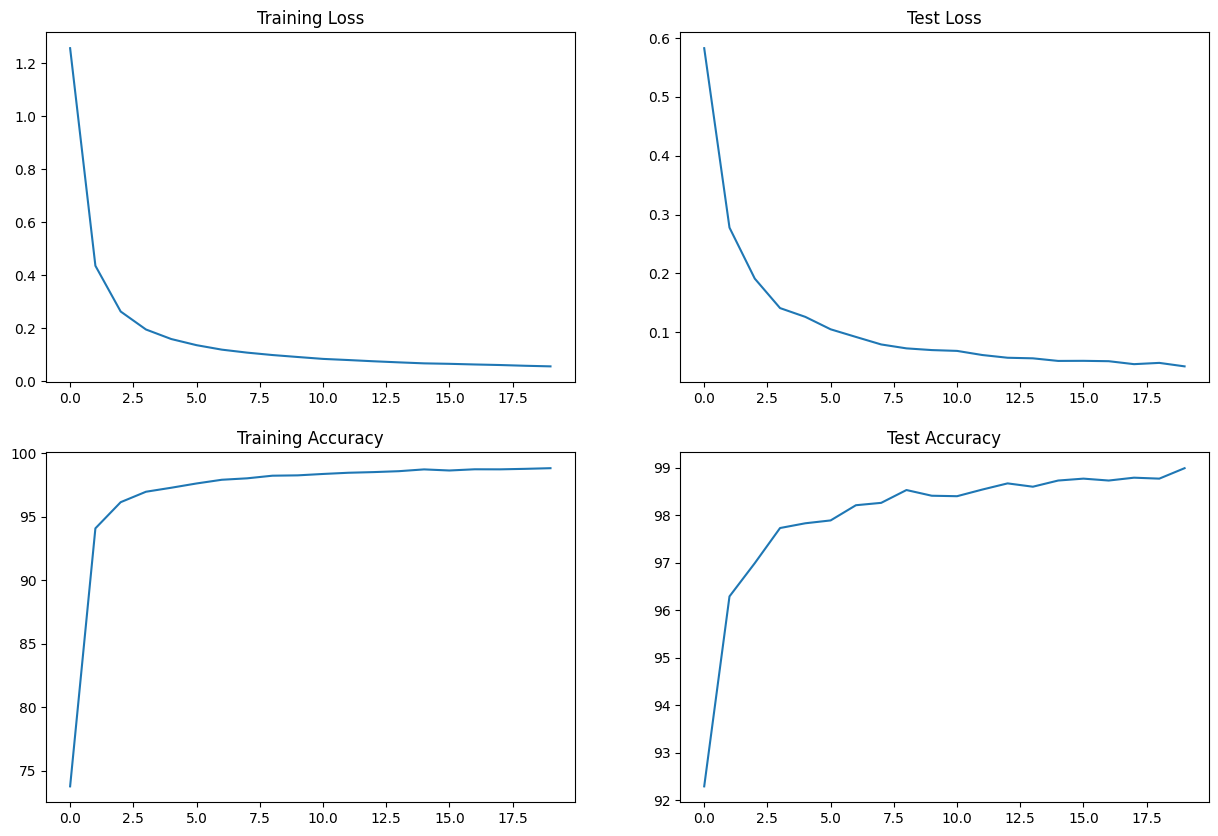

In [12]:
plot_losses()

# Objective:

* Add the Global Average Pooling

# Results:
* Total Parameters: 9.5k

* Best Training Accuracy: 98.81 (19th Epoch)

* Best Test Accuracy: 99.99 (20th Epoch)

# Analysis:
* GAP not decrease accuracy.
* We are comparing a 14.4k model with 9k model. Since we have reduced model capacity, a reduction in performance is expected.
